In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from nltk.corpus import stopwords
import pyarrow.parquet as pq
import pyarrow as pa
from tabulate import tabulate
from hdbscan import HDBSCAN
from bertopic.representation import KeyBERTInspired
from sklearn.manifold import TSNE


In [2]:
sentence_model = SentenceTransformer("jvanhoof/all-MiniLM-L6-multilingual-v2-en-es-pt-pt-br")

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

You try to use a model that was created with version 3.3.1, however, your version is 3.1.1. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





README.md:   0%|          | 0.00/113k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.00M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

In [4]:
restored_model = BERTopic.load('../../job_outputs/merged_model_update',embedding_model=sentence_model)

2025-06-05 13:35:26,459 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model.If you want to also load in an embedding model, make sure to useBERTopic.load(my_model, embedding_model=my_embedding_model).


In [5]:
pca_model = PCA(
                n_components= 10
            )

In [6]:
umap_model = UMAP(
                n_neighbors=10,
                n_components=2,
                min_dist=0.01,
                metric="cosine",
                random_state=1234,
                low_memory=True
            )

In [7]:
tsne_model = TSNE(
                n_components=2,
                metric="cosine",
                random_state=1234
            )

In [8]:
model_embeddings = restored_model.topic_embeddings_

In [9]:
pca = pca_model.fit_transform(model_embeddings)

In [10]:
coordinates = umap_model.fit_transform(pca)

In [11]:
df = pd.DataFrame(coordinates, columns=['x', 'y'])

In [12]:
df.to_csv('../../job_outputs/merged_model_update/coordinates.csv', index=False)

In [13]:
coordinates2 = tsne_model.fit_transform(pca)

In [14]:
df2 = pd.DataFrame(coordinates2, columns=['x', 'y'])

In [15]:
df2.to_csv('../../job_outputs/merged_model_update/coordinates_tsne.csv', index=False)

<Axes: xlabel='x', ylabel='y'>

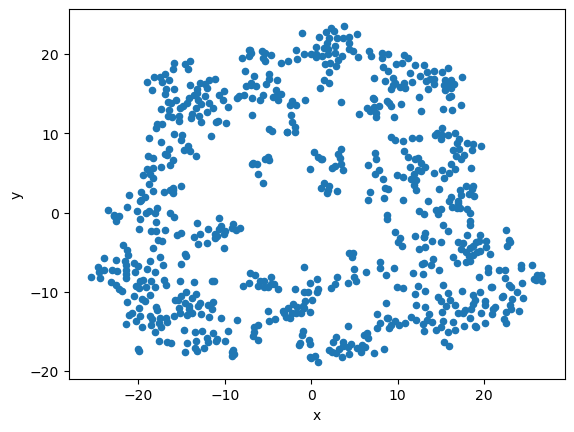

In [18]:
df2.plot(x='x', y='y', kind='scatter')